### Project Objectives:
- In this project I aim to predict the median housing value using neural network model in Keras
- Author: Carlos Caballero - Data Scientist
- Dataset: CA housing dataset obtained from https://raw.githubusercoent.com/ageron/hansdon-ml2/master/datasets/housing
- Models: Multilayer Perceptron (MLP), with stochastic gradient descent (SGD), no activation function due to single output 
- Method: Fit images and evaluate performance

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn
import csv
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [12]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3395 - accuracy: 0.0034 - val_loss: 0.3853 - val_accuracy: 0.0016
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3430 - accuracy: 0.0034 - val_loss: 0.3759 - val_accuracy: 0.0016
Epoch 3/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3342 - accuracy: 0.0034 - val_loss: 0.3604 - val_accuracy: 0.0016
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3325 - accuracy: 0.0034 - val_loss: 0.4506 - val_accuracy: 0.0016
Epoch 5/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3329 - accuracy: 0.0034 - val_loss: 0.3820 - val_accuracy: 0.0016
Epoch 6/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3308 - accuracy: 0.0034 - val_loss: 0.3699 - val_accuracy: 0.0016
Epoch 7/20
11610/11610 [==============================] -

In [13]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # created 3 new instances
y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 14us/sample - loss: 0.3899 - accuracy: 0.0031


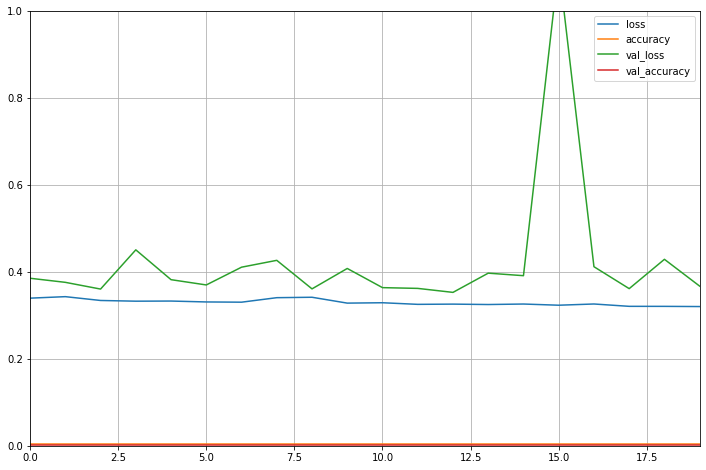

In [14]:
# Visualize model
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

### Accuracy is low, need to build a more complex network using functional API instead of sequential API